# **HOMEWORK 4**
---

**Goal:** Build a multilayer perceptron (MLP) model & for classifying SVHN dataset.

**Dataset:** SVHN, 32x32 RGB number images.        
http://ufldl.stanford.edu/housenumbers/

---

###**Instructions**             
**1)** **Preprocessing**  
> **1.1)** Load the dataset                 
> **1.2)** Normalize features                
  **1.3)** Visualize dataset

**2)** **Modelling**
> **2.1)** Try different fully hyperparameters (# of hidden layers, learning rate, # of epochs, # of neurons, add dropout, etc.)             
> **2.2)** Train with early stopping

**3)** **Report**                   
Share your results, which hyperparameters you used, train & test accuracy, etc. 
Write an at most 1/2-page summary of your approach to this problem at the end of your notebook; this should be like an executive summary. Include problem definition and preprocessing as well.


> **Topics to Discuss:**                                      
Explain you results.           
How did you choose the best hyperparameters?                         
What happened when the # of epochs are too large/small, why?                  
What happened when the learning rate is too large/small, why?              
What did you observe when you change the # of hidden layers?                
What did you observe when you change the # of neurons?   
What is the use of adding dropout?                     
What is the use of early stopping? 


---


**Note:** Don't forget to change Colab's runtime to GPU.







#1) Preprocessing
Load, normalize and visualize data


---





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load SVHN dataset
import scipy.io as sio
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

def load_data(path):
    data = sio.loadmat(path)
    return data['X'], data['y']

x_train, y_train = load_data('/content/drive/My Drive/CS412/train_32x32.mat')
x_test, y_test = load_data('/content/drive/My Drive/CS412/test_32x32.mat')


# Summarize dataset (count, shape, min/max value)

FileNotFoundError: ignored

In [ ]:
x_train.shape

(32, 32, 3, 73257)

In [ ]:
#Change input shape

x_train = np.moveaxis(x_train, -1, 0)
x_test = np.moveaxis(x_test, -1, 0)

In [ ]:
x_train.shape

(73257, 32, 32, 3)

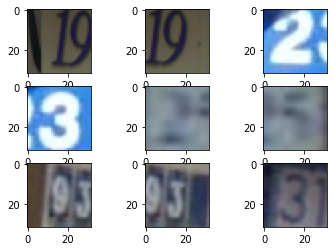

In [ ]:
# Visualize some samples
from matplotlib import pyplot
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [ ]:
# Normalize dataset recit11
# Reshape the data (flattening)
trainSz = x_train.shape
x_train = x_train.reshape(trainSz[0], trainSz[1]*trainSz[2]*trainSz[3])

testSz = x_test.shape
x_test = x_test.reshape(testSz[0], testSz[1]*testSz[2]*trainSz[3])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
"""from keras.utils import to_categorical
#one-hot encode
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)"""
print(x_train.shape, x_test.shape)

(73257, 3072) (26032, 3072)


#2) Modelling
(Build, compile, fit, evaluate)


---



##2.1) Part 1

---



In [ ]:
y_train[y_train==10]=0
y_test[y_test==10]=0

In [ ]:
#learning rate=0.00001, hidden layer 1
#epoch 10
#batch 128
model1 = Sequential()
model1.add(Dense(1024, activation='relu', input_shape=(x_train.shape[1],), name='hidden_layer1'))
model1.add(Dense(10, activation='softmax', name='output_layer'))
model1.summary()
model1.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])
history = model1.fit(x_train, y_train, batch_size=128, epochs=10, #validation_data=(x_val, y_val), 
                    validation_split = 0.2, #automatically reserve part of the training data for validation
                    verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
output_layer (Dense)         (None, 10)                10250     
Total params: 3,157,002
Trainable params: 3,157,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
458/458 [==============================] - 22s 47ms/step - loss: 2.2421 - accuracy: 0.1961 - val_loss: 2.1793 - val_accuracy: 0.2507
Epoch 2/10
458/458 [==============================] - 21s 46ms/step - loss: 2.1666 - accuracy: 0.2332 - val_loss: 2.1119 - val_accuracy: 0.2773
Epoch 3/10
458/458 [==============================] - 21s 46ms/step - loss: 2.0962 - accuracy: 0.2816 - val_loss: 2.0397 - val_accuracy: 0.3236
Epoch 4/10
458/458 [==============================] - 21s 46ms/step - loss: 

In [ ]:
#hidden layer 1, learning rate=0.00001, epoch 10, batch 256
model2 = Sequential()
model2.add(Dense(1024, activation='relu', input_shape=(x_train.shape[1],), name='hidden_layer1'))
model2.add(Dense(10, activation='softmax', name='output_layer'))
model2.summary()
model2.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])
hist2 = model2.fit(x_train, y_train, batch_size=256, epochs=10, #validation_data=(x_val, y_val), 
                    validation_split = 0.2, #automatically reserve part of the training data for validation
                    verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
output_layer (Dense)         (None, 10)                10250     
Total params: 3,157,002
Trainable params: 3,157,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
229/229 [==============================] - 18s 78ms/step - loss: 2.2503 - accuracy: 0.1873 - val_loss: 2.2043 - val_accuracy: 0.2030
Epoch 2/10
229/229 [==============================] - 18s 77ms/step - loss: 2.1893 - accuracy: 0.2190 - val_loss: 2.1578 - val_accuracy: 0.2469
Epoch 3/10
229/229 [==============================] - 18s 78ms/step - loss: 2.1428 - accuracy: 0.2425 - val_loss: 2.1141 - val_accuracy: 0.2530
Epoch 4/10
229/229 [==============================] - 18s 79ms/step - loss

In [ ]:
#hidden layer 1, learning rate=0.00001, epoch 100, batch 256
model3 = Sequential()
model3.add(Dense(1024, activation='relu', input_shape=(x_train.shape[1],), name='hidden_layer1'))
model3.add(Dense(10, activation='softmax', name='output_layer'))
model3.summary()
model3.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])
hist3 = model3.fit(x_train, y_train, batch_size=256, epochs=100, #validation_data=(x_val, y_val), 
                    validation_split = 0.2, #automatically reserve part of the training data for validation
                    verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
output_layer (Dense)         (None, 10)                10250     
Total params: 3,157,002
Trainable params: 3,157,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
229/229 [==============================] - 18s 79ms/step - loss: 2.2471 - accuracy: 0.1825 - val_loss: 2.1953 - val_accuracy: 0.2245
Epoch 2/100
229/229 [==============================] - 18s 78ms/step - loss: 2.1821 - accuracy: 0.2228 - val_loss: 2.1495 - val_accuracy: 0.2488
Epoch 3/100
229/229 [==============================] - 18s 78ms/step - loss: 2.1349 - accuracy: 0.2483 - val_loss: 2.1026 - val_accuracy: 0.2842
Epoch 4/100
229/229 [==============================] - 18s 78ms/step - 

In [ ]:
#hidden layer 3, learning rate=0.00001, epoch 10, batch 256
model4=Sequential()
model4.add(Dense(1024, activation='relu', input_shape=(x_train.shape[1],), name='hidden_layer1'))
model4.add(Dense(512, activation='relu', name='hidden_layer2'))
model4.add(Dense(128, activation='relu', name='hidden_layer3'))
model4.add(Dense(10, activation='softmax', name='output_layer'))
model4.summary()
model4.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])
hist4 = model4.fit(x_train, y_train, batch_size=256, epochs=10, #validation_data=(x_val, y_val), 
                    validation_split = 0.2, #automatically reserve part of the training data for validation
                    verbose=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               65664     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 3,738,506
Trainable params: 3,738,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
229/229 [==============================] - 24s 104ms/step - loss: 2.2363 - accuracy: 0.1890 - val_loss: 2.1716 - val_accuracy: 0.2419
Epoch 2/10
229/229 [==============================] - 23s 101ms/step - loss: 2.1450 - accuracy: 0

In [ ]:
#hidden layer 3, learning rate=0.0001, epoch 10, batch 256
model5=Sequential()
model5.add(Dense(1024, activation='relu', input_shape=(x_train.shape[1],), name='hidden_layer1'))
model5.add(Dense(512, activation='relu', name='hidden_layer2'))
model5.add(Dense(128, activation='relu', name='hidden_layer3'))
model5.add(Dense(10, activation='softmax', name='output_layer'))
model5.summary()
model5.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
hist5 = model5.fit(x_train, y_train, batch_size=256, epochs=10, #validation_data=(x_val, y_val), 
                    validation_split = 0.2, #automatically reserve part of the training data for validation
                    verbose=1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               65664     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 3,738,506
Trainable params: 3,738,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
229/229 [==============================] - 26s 114ms/step - loss: 2.1959 - accuracy: 0.2126 - val_loss: 1.7853 - val_accuracy: 0.4328
Epoch 2/10
229/229 [==============================] - 24s 107ms/step - loss: 1.6346 - accuracy: 0

In [ ]:
#hidden layer 3, learning rate=0.0001, epoch 100, batch 128
model6 = Sequential()
model6.add(Dense(1024, activation='relu', input_shape=(x_train.shape[1],), name='hidden_layer1'))
model6.add(Dense(512, activation='relu', name='hidden_layer2'))
model6.add(Dense(10, activation='softmax', name='output_layer'))
model6.summary()
model6.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
hist6 = model6.fit(x_train, y_train, batch_size=128, epochs=100, #validation_data=(x_val, y_val), 
                    validation_split = 0.2, #automatically reserve part of the training data for validation
                    verbose=1)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
output_layer (Dense)         (None, 10)                5130      
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
458/458 [==============================] - 29s 62ms/step - loss: 2.1520 - accuracy: 0.2403 - val_loss: 1.5939 - val_accuracy: 0.5064
Epoch 2/100
458/458 [==============================] - 29s 62ms/step - loss: 1.4707 - accuracy: 0.5400 - val_loss: 1.2427 - val_accuracy: 0.6334
Epoch 3/100
458/458 [==============================] - 28s 62ms/step - loss: 1.1896 

In [ ]:
# Evaluate the model on test data
score = model6.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred = model6.predict(x_test)

y_pred_ = np.argmax(y_pred, axis = 1)

y_pred_

Test loss: 0.8308233022689819
Test accuracy: 0.80854332447052


array([5, 2, 1, ..., 7, 6, 7])




---


**Dropout** : [Dropout](https://keras.io/api/layers/regularization_layers/dropout/) is a regularization approach. At each training stage, specified percent of individual nodes are dropped out of the network.

[Read](https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/) MLP Dropout Regularization for further information

![picture](https://drive.google.com/uc?id=12lv5VsPFLt6sKEZvgQRyQ7mHeW4l-Vq9)

In [ ]:
#Try adding dropout to the architecture 
#similar to model 4
from keras.layers import Dropout
model7=Sequential()
model7.add(Dense(1024, activation='relu', input_shape=(x_train.shape[1],), name='hidden_layer1'))
model7.add(Dropout(0.2))
model7.add(Dense(512, activation='relu', name='hidden_layer2'))
model7.add(Dropout(0.2))
model7.add(Dense(128, activation='relu', name='hidden_layer3'))
model7.add(Dropout(0.2))
model7.add(Dense(10, activation='softmax', name='output_layer'))
model7.summary()
model7.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])
hist7 = model7.fit(x_train, y_train, batch_size=256, epochs=10, #validation_data=(x_val, y_val), 
                    validation_split = 0.2, #automatically reserve part of the training data for validation
                    verbose=1)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               65664     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
output_layer (Dense)         (None, 10)              

In [ ]:
# Evaluate the model on test data
score = model7.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred = model7.predict(x_test)

y_pred_ = np.argmax(y_pred, axis = 1)

y_pred_

Test loss: 1.5299440622329712
Test accuracy: 0.5263521671295166


array([3, 2, 1, ..., 3, 6, 2])

##2.2) Part 2


---



When training a model, model stops generalizing after a while and learns noices of the datapoints as well. One way to avoid this **overfitting** is to use **early stopping**. With early stopping, model performance is monitored on validation data in each epoch and stops updating weights when validation performance starts decreasing.

https://keras.io/api/callbacks/early_stopping/

![picture](https://drive.google.com/uc?id=1Rs8FkpVgifspzvlIfdTDYyBVjR01OgVj)

In [ ]:
# Build & compile the model 
model=Sequential()
model.add(Dense(1024, activation='relu', input_shape=(x_train.shape[1],), name='hidden_layer1'))
model.add(Dense(512, activation='relu', name='hidden_layer2'))
model.add(Dense(128, activation='relu', name='hidden_layer3'))
model.add(Dense(10, activation='softmax', name='output_layer'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               65664     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 3,738,506
Trainable params: 3,738,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Aim is to stop when minimum validation loss is achieved
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min',restore_best_weights=True) # Training will stop when minimum validation loss is achieved
                    
#model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=200, callbacks=[es])
history= model.fit(x_train, y_train, batch_size=128,
                              epochs=500, validation_split=0.2, # you can have large epoch size since it will stop when best validation loss is achieved
                              callbacks=[es], verbose=1)

Epoch 1/500
458/458 [==============================] - 2s 4ms/step - loss: 0.3520 - accuracy: 0.8943 - val_loss: 0.5660 - val_accuracy: 0.8415
Epoch 2/500
458/458 [==============================] - 2s 4ms/step - loss: 0.3454 - accuracy: 0.8957 - val_loss: 0.5733 - val_accuracy: 0.8419
Epoch 3/500
458/458 [==============================] - 2s 4ms/step - loss: 0.3378 - accuracy: 0.8967 - val_loss: 0.5630 - val_accuracy: 0.8440
Epoch 4/500
458/458 [==============================] - 2s 4ms/step - loss: 0.3335 - accuracy: 0.8991 - val_loss: 0.5541 - val_accuracy: 0.8483
Epoch 5/500
458/458 [==============================] - 2s 4ms/step - loss: 0.3275 - accuracy: 0.9007 - val_loss: 0.5584 - val_accuracy: 0.8474
Epoch 6/500
458/458 [==============================] - 2s 4ms/step - loss: 0.3289 - accuracy: 0.8997 - val_loss: 0.5561 - val_accuracy: 0.8434
Epoch 7/500
458/458 [==============================] - 2s 4ms/step - loss: 0.3169 - accuracy: 0.9042 - val_loss: 0.5933 - val_accuracy: 0.8371

![picture](https://drive.google.com/uc?id=1Mp2W2VVQVmyuleSDNDKJLI6hxAtyG5gx)

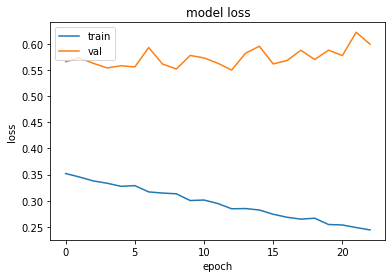

In [ ]:
#Plot train & validation loss
from matplotlib import pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Evaluate on test data

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred = model.predict(x_test)

y_pred_ = np.argmax(y_pred, axis = 1)

y_pred_

Test loss: 0.6847413778305054
Test accuracy: 0.8272126317024231


array([5, 2, 1, ..., 7, 6, 7])

#3) Report


---

Summary of models you try (learning rate, # of hidden layers, # of epochs, test accuracy, etc.) Write a short report & discuss the results of the models you trained

model 1:
*   learning rate=0.00001
*   1 hidden layer
*   10 epochs
*   batch=128
*   loss: 1.6058 - accuracy: 0.5409 - val_loss: 1.5909 - val_accuracy: 0.5517

model 2:
*   learning rate=0.00001
*   1 hidden layer
*   10 epochs
*   batch=256
*   loss: 1.7838 - accuracy: 0.4622 - val_loss: 1.7699 - val_accuracy: 0.4958

Observing model 1 and model 2, we can see that batch size 128 gives a better validation accuracy score and less loss than batch size 256.

model 3:
*   learning rate=0.00001
*   1 hidden layer
*   100 epochs
*   batch=256
*   loss: 0.7985 - accuracy: 0.7764 - val_loss: 0.8586 - val_accuracy: 0.7528

Observing model 2 and model 3, given other parameters are the same, 100 epochs give much higher accuracies and lower losses than 10 epochs.

model 4:
*   learning rate=0.00001
*   3 hidden layers
*   10 epochs
*   batch=256
*   loss: 1.3517 - accuracy: 0.6025 - val_loss: 1.3359 - val_accuracy: 0.6185

Observing model 2 and model 4, we see that 3 hidden layers give higher accuracy and lower loss than using 1 hidden layer.

model 5:
*   learning rate=0.0001
*   3 hidden layers
*   10 epochs
*   batch=256
*   loss: 0.8388 - accuracy: 0.7488 - val_loss: 0.8594 - val_accuracy: 0.7353

Observing model 4 and model 5, giving learning rate 0.0001 gives more validation accuracy and less loss than giving it as 0.00001.

model 6:
*   learning rate=0.0001
*   3 hidden layers
*   100 epochs
*   batch=128
*   accuracy: 0.9416 - val_loss: 0.6560 - val_accuracy: 0.8330

With the results we have received from the first 5 models, we tried to apply optimum hyperparameters in model 6. 
We got: 
Test loss: 0.83
Test accuracy: 0.80 in model 6.

With model 7 which is similar to model 4 only with 0.2 dropout in every layer, we got:
*   loss: 1.6515 - accuracy: 0.4674 - val_loss: 1.5197 - val_accuracy: 0.5375
*   Test loss: 1.52
*   Test accuracy: 0.52

With early stopping which minimizes the validation loss, we stopped at 23rd epoch and on 0.2441 - accuracy: 0.9257 - val_loss: 0.5996 - val_accuracy: 0.8456 it prevented overfit. And final results on test data became Test loss: 0.68
Test accuracy: 0.82